In [1]:
import keras
import tensorflow
import mnist

Using TensorFlow backend.
C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Administrator\anaconda3\lib\site-packages\tenso

In [2]:
# The full neural network code!
###############################
import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [3]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

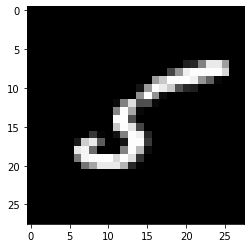

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
first_image = train_images[11]
plt.imshow(first_image, cmap='gray')
plt.show()

In [5]:
# Normalize the images.
train_images = (train_images / 255) - 5
test_images = (test_images / 255) - 5

In [6]:
train_images[0]

array([[-5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        ],
       [-5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        ],
       [-5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.    

In [7]:
# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [8]:
# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

In [9]:
# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [10]:
# Train the model.
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
)


Epoch 1/5
60000/60000 [==============================] - 2s 31us/step - loss: 1.8395 - accuracy: 0.3123
Epoch 2/5
60000/60000 [==============================] - 2s 29us/step - loss: 1.3155 - accuracy: 0.4862
Epoch 3/5
60000/60000 [==============================] - 2s 29us/step - loss: 1.2324 - accuracy: 0.5195
Epoch 4/5
60000/60000 [==============================] - 2s 29us/step - loss: 1.1356 - accuracy: 0.5633
Epoch 5/5
60000/60000 [==============================] - 2s 29us/step - loss: 1.0199 - accuracy: 0.6190


In [11]:
# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

10000/10000 [==============================] - 0s 18us/step


[0.9362364923477173, 0.6516000032424927]

In [12]:
test_images[0].reshape((28,28))

array([[-5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        ],
       [-5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        ],
       [-5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.    

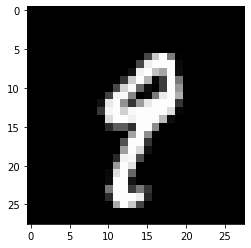

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
first_image = test_images[78]
plt.imshow(first_image.reshape((28,28)), cmap='gray')
plt.show()

In [14]:
np.argmax(model.predict(test_images[78].reshape((-1,784))))

9

In [15]:
# Save the model to disk.
model.save_weights('model.h5')

# Load the model from disk later using:
# model.load_weights('model.h5')

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]

[7 2 1 0 4]
[7 2 1 0 4]
